In [1]:
import numpy as  np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import  spearmanr
from scipy.stats import pearsonr
from scipy.stats import wilcoxon
from scipy.stats import probplot
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data_set=pd.read_csv("student_details.csv")
print(data_set.head)

<bound method NDFrame.head of        id first name    last name                       email  gender  \
0       1   Shepperd    Werendell       swerendell0@wikia.com    Male   
1       2     Sigrid     Jannasch    sjannasch1@aboutads.info  Female   
2       3      Dayle       Aggett      daggett2@moonfruit.com  Female   
3       4    Ronnica      Sallier   rsallier3@stumbleupon.com  Female   
4       5    Tierney     Mattheus      tmattheus4@t-online.de  Female   
..    ...        ...          ...                         ...     ...   
995   996      Virge       Hawkin      vhawkinrn@so-net.ne.jp    Male   
996   997       Etty    Lippiello         elippielloro@a8.net  Female   
997   998      Sadie  Rosenwasser  srosenwasserrp@example.com  Female   
998   999    Jacklin     Brightie     jbrightierq@histats.com  Female   
999  1000     Darsey        Trude            dtruderr@wix.com  Female   

     sub1_marks  sub2_marks  sub3_marks  total   Pass  \
0          68.0        58.0        6

In [3]:
##Data Cleaning ##
data_set['sub1_marks']=data_set['sub1_marks'].fillna(data_set['sub1_marks'].mean())
data_set['sub2_marks']=data_set['sub2_marks'].fillna(data_set['sub2_marks'].mean())
data_set['sub3_marks']=data_set['sub3_marks'].fillna(data_set['sub3_marks'].mean())
data_set['total']=data_set['sub1_marks'] + data_set['sub2_marks'] + data_set['sub3_marks']
data_set['Movie Genres']=data_set['Movie Genres'].fillna(method="backfill")

In [4]:
data_set.to_csv("cleanfile.csv")
details=pd.read_csv("cleanfile.csv")

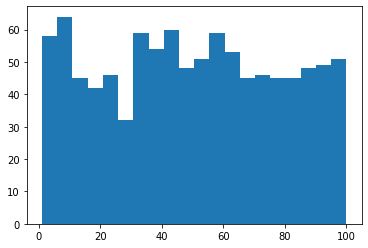

In [5]:
x1=details['sub2_marks']
X1=np.array(x1)
plt.hist(X1, bins=(20))
plt.show()


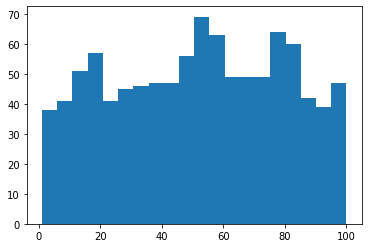

In [6]:
x1=details['sub1_marks']
X1=np.array(x1)
plt.hist(X1, bins=(20))
plt.show()

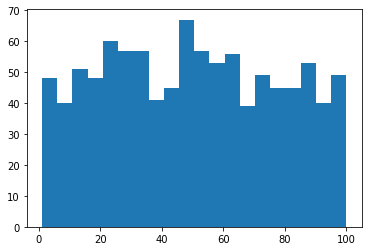

In [7]:
x1=details['sub3_marks']
X1=np.array(x1)
plt.hist(X1, bins=(20))
plt.show()

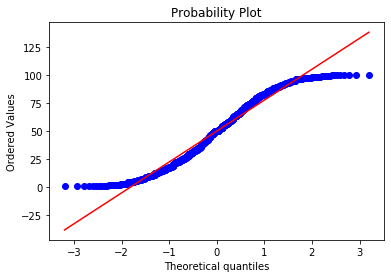

In [8]:
x2=details['sub1_marks']
probplot(x1,dist="norm",plot=plt)
plt.show()

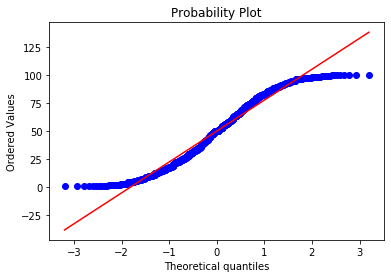

In [9]:
x2=details['sub2_marks']
probplot(x1,dist="norm",plot=plt)
plt.show()

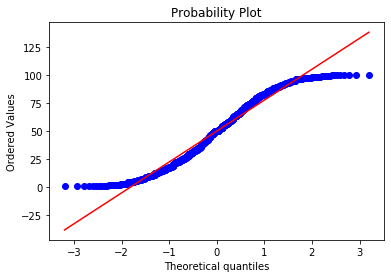

In [10]:
x3=details['sub3_marks']
probplot(x3,dist="norm",plot=plt)
plt.show()



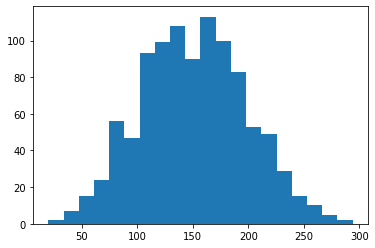

In [11]:
x4=details['total']
X4=np.array(x4)
plt.hist(X4,bins=20)
plt.show()

In [12]:
##Normalization of numeric columns to make mean 0 and variance 1
scaler=StandardScaler()
data_normalized1=scaler.fit_transform(details['sub2_marks'].values.reshape(-1,1))
print(data_normalized1.mean(axis=0))
print(data_normalized1.std(axis=0))
data_normalized2=scaler.fit_transform(details['sub1_marks'].values.reshape(-1,1))
print(data_normalized2.mean(axis=0))
print(data_normalized2.std(axis=0))
data_normalized3=scaler.fit_transform(details['sub3_marks'].values.reshape(-1,1))
print(data_normalized3.mean(axis=0))
print(data_normalized3.std(axis=0))
data_normalized4=scaler.fit_transform(details['total'].values.reshape(-1,1))
print(data_normalized4.mean(axis=0))
print(data_normalized4.std(axis=0))

[-3.55271368e-18]
[1.]
[-7.46069873e-17]
[1.]
[-2.31814568e-16]
[1.]
[3.99680289e-16]
[1.]


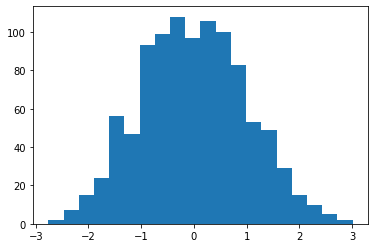

In [13]:

x4=data_normalized4
X4=np.array(x4)
plt.hist(X4,bins=20)
plt.show()

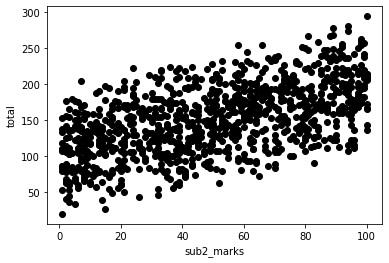

In [14]:
##data visualization

x=details['sub2_marks']
y=details['total']
x_plot=np.array(x)
y_plot=np.array(y)
plt.scatter(x_plot,y_plot,color="black")
plt.xlabel("sub2_marks")
plt.ylabel("total")
plt.show()

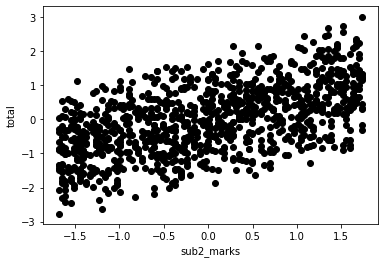

In [15]:
x=data_normalized1
y=data_normalized4
x_plot=np.array(x)
y_plot=np.array(y)
plt.scatter(x_plot,y_plot,color="black")
plt.xlabel("sub2_marks")
plt.ylabel("total")
plt.show()

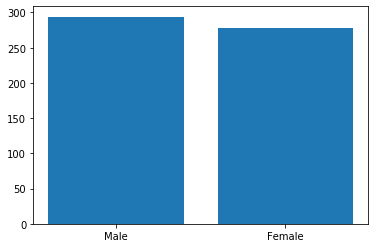

In [16]:
#Bar chart

x=details['gender']
y=details['total']
plt.bar(x,y) 
plt.show()

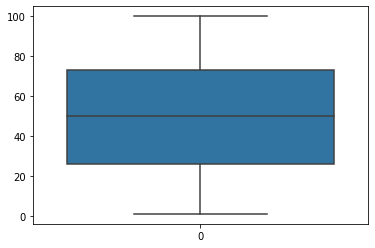

In [17]:
#boxplot
stats_df = details['sub3_marks']
sns.boxplot(data=stats_df)

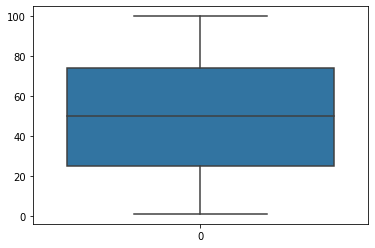

In [18]:
stats_df = details['sub2_marks']
sns.boxplot(data=stats_df)

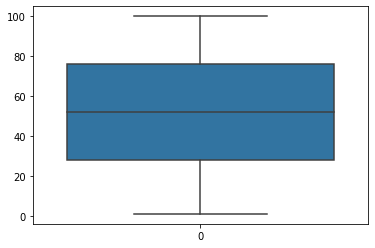

In [19]:
stats_df = details['sub1_marks']
sns.boxplot(data=stats_df)

In [20]:
from random import sample 
no_of_elements = 25
random_index = sample(range(data_set['sub1_marks'].shape[0]), no_of_elements)
print(random_index)
df = list(data_set['sub1_marks'].iloc[random_index])

[19, 935, 279, 927, 674, 233, 297, 923, 548, 317, 765, 384, 992, 168, 547, 781, 659, 722, 397, 380, 31, 299, 713, 324, 496]


In [21]:
no_of_elements = 25
random_index = sample(range(data_set['sub2_marks'].shape[0]), no_of_elements)
print(random_index)
df2 = list(data_set['sub2_marks'].iloc[random_index])

[999, 888, 161, 143, 244, 180, 128, 548, 675, 773, 882, 189, 206, 859, 954, 786, 795, 918, 18, 979, 743, 731, 104, 590, 125]


In [28]:
##Hypothesis testing
#t-test

data1=df
data2=df2
stat1,p1=ttest_ind(data1,data2)
print(stat1)
print(p1) 
if p1<0.05:
    print(" Reject  Null hypothesis")
else:
    print("Fail to reject null hypothesis")

#t-statistic-1=1.133
#p-value=0.18
#H0:The means of samples are equal
#H1:the means of samples are not equal

1.5220090232462993
0.1345680297711496
Fail to reject null hypothesis


In [23]:
no_of_elements = 25
random_index = sample(range(data_set['sub3_marks'].shape[0]), no_of_elements)
print(random_index)
df3 = list(data_set['sub3_marks'].iloc[random_index])

[225, 442, 685, 998, 931, 600, 295, 386, 621, 992, 871, 715, 179, 141, 270, 266, 800, 311, 801, 725, 816, 881, 1, 826, 188]


In [24]:
no_of_elements = 25
random_index = sample(range(data_set['total'].shape[0]), no_of_elements)
print(random_index)
df4 = list(data_set['total'].iloc[random_index])

[507, 0, 783, 397, 239, 833, 543, 454, 92, 353, 390, 272, 849, 278, 11, 463, 485, 125, 73, 610, 277, 906, 70, 398, 133]


In [25]:
#paired t test
data3=df3
data4=df4
stat3,p3=ttest_rel(data2,data3)
print(stat3,p3)

if p3<0.05:
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")

-0.8299870777657908 0.4147261276146875
fail to reject null hypothesis


In [26]:
##Correlation between variables
dataa1=details['sub1_marks']
dataa2=details['sub2_marks']
dataa3=details['sub3_marks']
dataa4=details['total']
print(dataa1.corr(dataa2))
print(dataa1.corr(dataa3))
print(dataa1.corr(dataa4))
print(dataa2.corr(dataa3))
print(dataa2.corr(dataa4))
print(dataa3.corr(dataa4))

-0.04331694696270803
0.0012387216807869185
0.5582184128019892
-0.04841520287995994
0.5578469483443255
0.5625597357462517
